### Title: BIOS512 — Final Project: Paris 2024 Olympic Analysis  
### Name: Mara Tate   
### Date: December 9, 2025  

### Data Description
Link: https://www.kaggle.com/datasets/piterfm/paris-2024-olympic-summer-games  
The Paris 2024 Olympic Summer Games open dataset contains multiple data files with comprehensive information from these Olympic games. It covers different aspects of the event, including participating countries, athletes, sports disciplines, medal standings, and key event details.



### CodeBook

| Table | Description | Variables |  
|------|---------|---------|
| **Athletes.csv** | Personal information about all athletes | Code, current, name, name_short, name_tv, gender, function, country_code, country, country_long, nationality, nationality_long, nationality_code, height, weight, disciplines, events, birth_date, birth_place, birth_country, residence_place,residence country, nickname, hobbies, occupation, education, family, lang, coach, reason, hero, influence, philosophy, sporting_relatives, ritual, other_sports |
| **Coaches.csvr** |Personal information about all coaches |Code, current, name, gender, function, category, country_code, country,country_long, disciplines, events, birth_date|
| **Events.csv** |All events that had a place | Event, tag, sport, sport_code, sport_url|
| **Medals.csv** | All medal holders| medal_type, medal_code, medal_date, name, gender, discipline, event, event_type, url_event, code, country_code, country, country_long |
| **Medals_total.csv** |All medals (grouped by country) | Country_code, country, country_long, Gold Medal, Silver Medal, Bronze Medal, Total|
| **Medalists.csv** |All medalists  | Medal_date, medal_type, medal_code, name, gender, country_code, country, country_long, nationality_code, nationality, nationality_long, team, team_gender, discipline, event, event_type, url_event, birth_date, code_athlete, code_team, is_medalist|
| **Nocs.csv** | all nocs (code, country, country_long ) | Code, country, country_long, tag, note|
| **Schedule.csv** | day-by-day schedule of all events | Start_date, end_date, day, status, discipline, discipline_code, event, event_medal, phase, gender, event_type, venue, venue_code, location_description, location_code, url|
| **Teams.csv** | all teams | Code, current, team, team_gender, country_code, country, country_long, discipline, discipline_code, events, athletes, coaches, athletes_codes, num_athletes, coaches_codes, num_codes |
| **Technical_officals.csv** | all technical officials (referees, judges, jury members) | Code, current, name, gender, function, category, organization_code, organization, organization_long, disciplines, birth_date|
| **Results.csv** | all results | *Separate csv with different variables for each sport|
| **Torch_route.csv** | torch relay places | Title, city, date_start, date_end, tag, url, stage_number |
| **Venues.csv** | all Olympic venues| Venue, sports, date_start, date_end, tag, url |

### Data Exploration and Analysis

Preliminary Data Exploration 

In [5]:
library(readr)
library (tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)

In [4]:
athletes <- read.csv("/Users/maratate/Desktop/BIOS512/Paris Oylmpics Data/athletes.csv")
medals <- read.csv("/Users/maratate/Desktop/BIOS512/Paris Oylmpics Data/medallists.csv")
glimpse(athletes)

### Calculate Age 
athletes$birth_date <- ymd(athletes$birth_date)

athletes$age <- floor(interval(athletes$birth_date, today()) / years(1))

glimpse(athletes)
glimpse(medals)

medals <- medals %>%
  rename(code = code_athlete)

medals_summary <- medals %>%
  group_by(code) %>%
  summarise(total_medals = n())

medals_summary <- medals_summary %>%
  left_join(athletes %>% select(code, age), by = "code")

medals_by_age <- medals_summary %>%
  group_by(age) %>%
  summarise(total_medals = sum(total_medals))


Rows: 11,113
Columns: 36
$ code               <int> 1532872, 1532873, 1532874, 1532944, 1532945, 153295…
$ current            <chr> "True", "True", "True", "True", "True", "True", "Tr…
$ name               <chr> "ALEKSANYAN Artur", "AMOYAN Malkhas", "GALSTYAN Sla…
$ name_short         <chr> "ALEKSANYAN A", "AMOYAN M", "GALSTYAN S", "HARUTYUN…
$ name_tv            <chr> "Artur ALEKSANYAN", "Malkhas AMOYAN", "Slavik GALST…
$ gender             <chr> "Male", "Male", "Male", "Male", "Male", "Female", "…
$ function.          <chr> "Athlete", "Athlete", "Athlete", "Athlete", "Athlet…
$ country_code       <chr> "ARM", "ARM", "ARM", "ARM", "ARM", "COL", "JAM", "G…
$ country            <chr> "Armenia", "Armenia", "Armenia", "Armenia", "Armeni…
$ country_long       <chr> "Armenia", "Armenia", "Armenia", "Armenia", "Armeni…
$ nationality        <chr> "Armenia", "Armenia", "Armenia", "Armenia", "Armeni…
$ nationality_long   <chr> "Armenia", "Armenia", "Armenia", "Armenia", "Armeni…
$ nationality_c

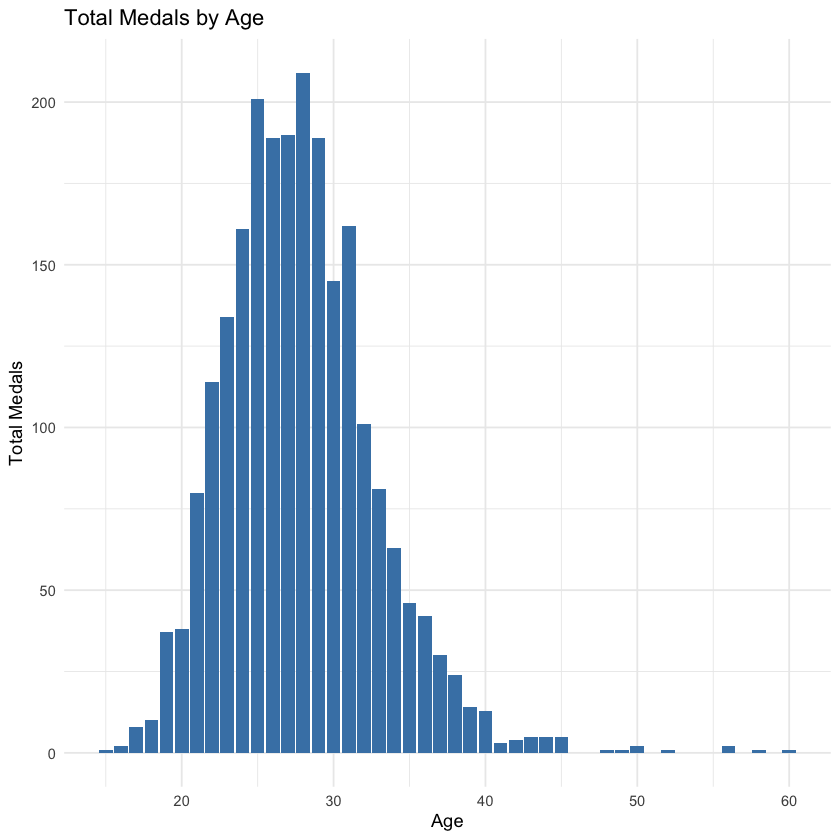

In [8]:
ggplot(medals_by_age, aes(x = age, y = total_medals)) +
  geom_col(fill = "steelblue") +
  labs(
    title = "Total Medals by Age",
    x = "Age",
    y = "Total Medals"
  ) +
  theme_minimal()

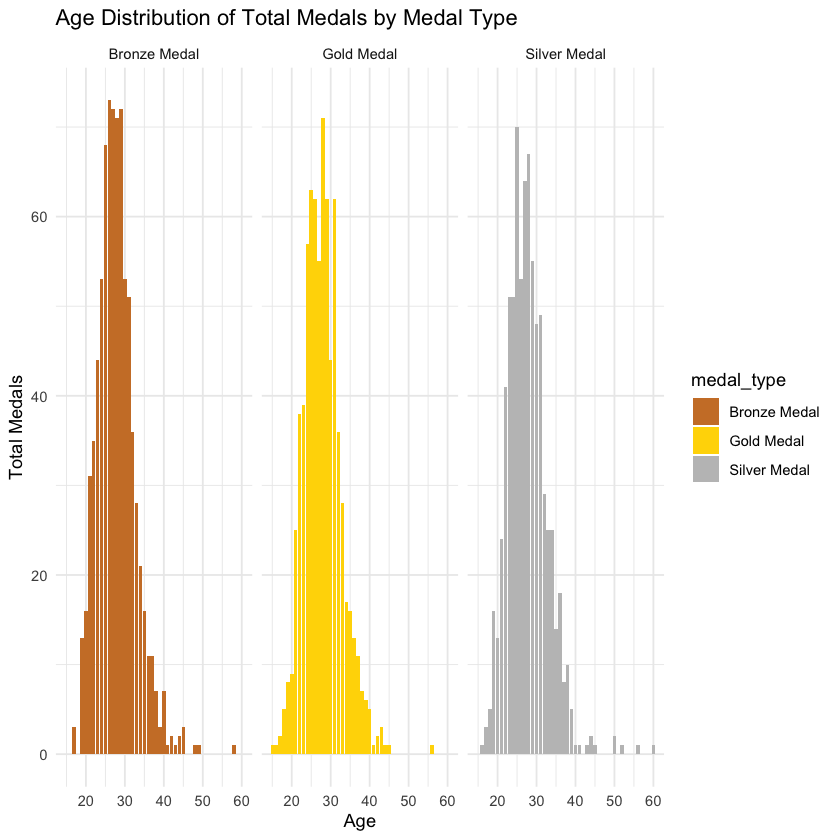

In [7]:
medals_by_type <- medals %>%
  left_join(athletes %>% select(code, age), by = "code") %>%
  group_by(age, medal_type) %>%           # group by age AND medal type
  summarise(total_medals = n(), .groups = "drop")


ggplot(medals_by_type, aes(x = age, y = total_medals, fill = medal_type)) +
  geom_col() +
  facet_wrap(~ medal_type, ncol = 3) +
  scale_fill_manual(values = c(
    "Gold Medal" = "gold",
    "Silver Medal" = "#C0C0C0",
    "Bronze Medal" = "#CD7F32"
  )) +
  labs(title = "Age Distribution of Total Medals by Medal Type", x = "Age", y = "Total Medals") +
  theme_minimal()

### Research Question 1: How do athlete characteristics (age, height, weight) differ between medalists and non-medalists?

Age histogram: medalists vs non-medalists

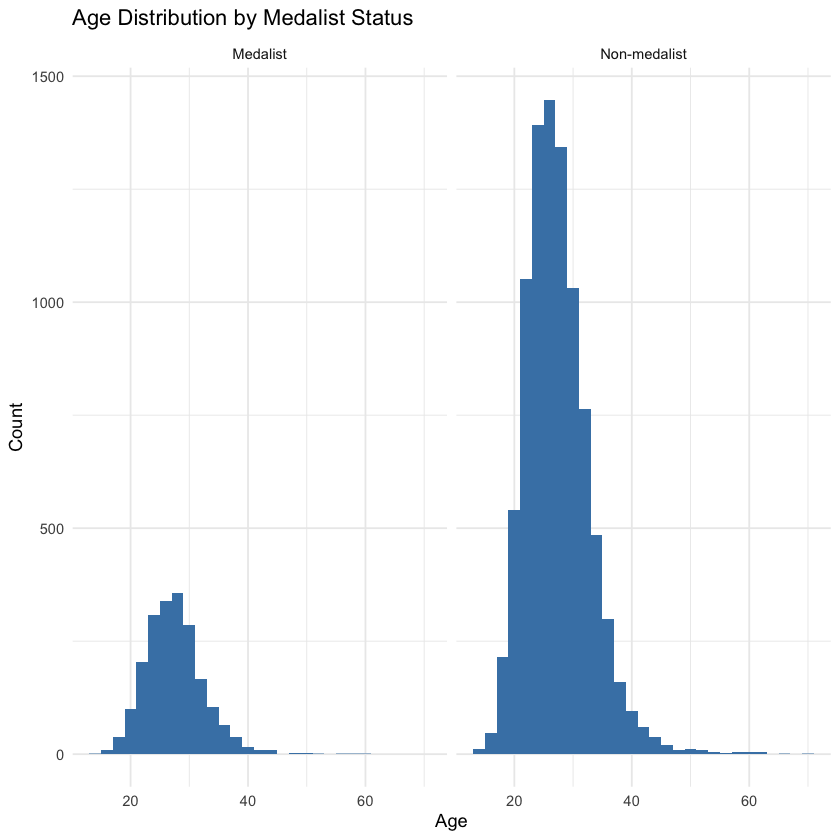

In [8]:
df <- athletes %>%
  mutate(medalist = ifelse(name %in% medals$name, 
                           "Medalist", "Non-medalist"))

ggplot(df, aes(x = age)) +
  geom_histogram(bins = 30, fill = "steelblue") +
  facet_wrap(~ medalist) +
  labs(title = "Age Distribution by Medalist Status",
       x = "Age", y = "Count") +
  theme_minimal()


Height vs Weight Scatterplot: Medalists vs Non-medalists

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


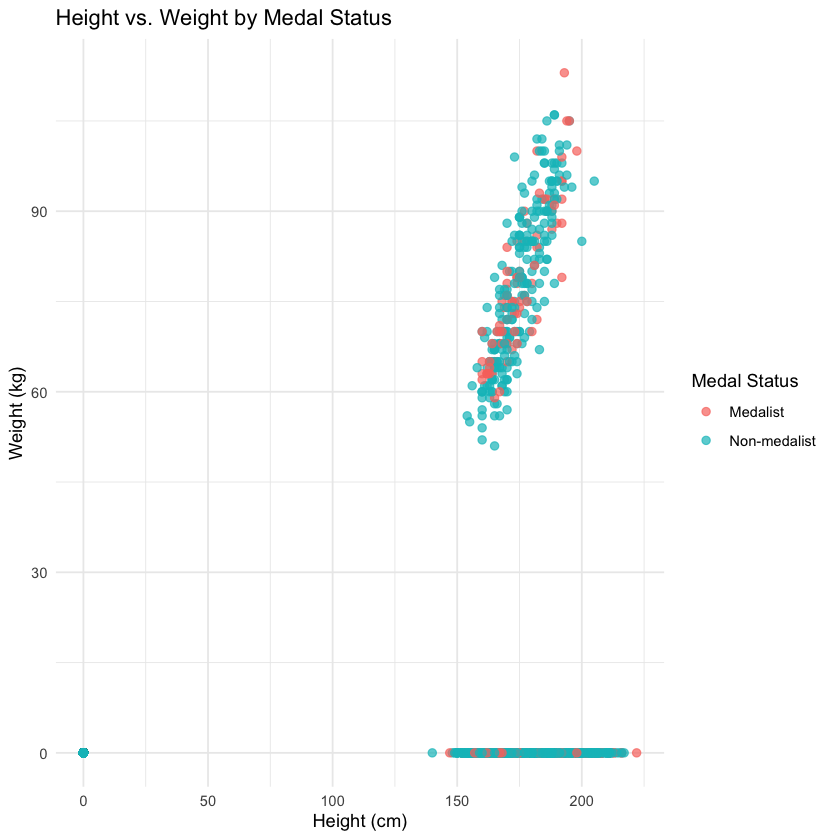

In [20]:
ggplot(df, aes(x = height, y = weight, color = medalist)) +
  geom_point(alpha = 0.7, size = 2) +
  labs(
    title = "Height vs. Weight by Medal Status",
    x = "Height (cm)",
    y = "Weight (kg)",
    color = "Medal Status"
  ) +
  theme_minimal()

Height vs Weight Scatterplot: By Medal Type

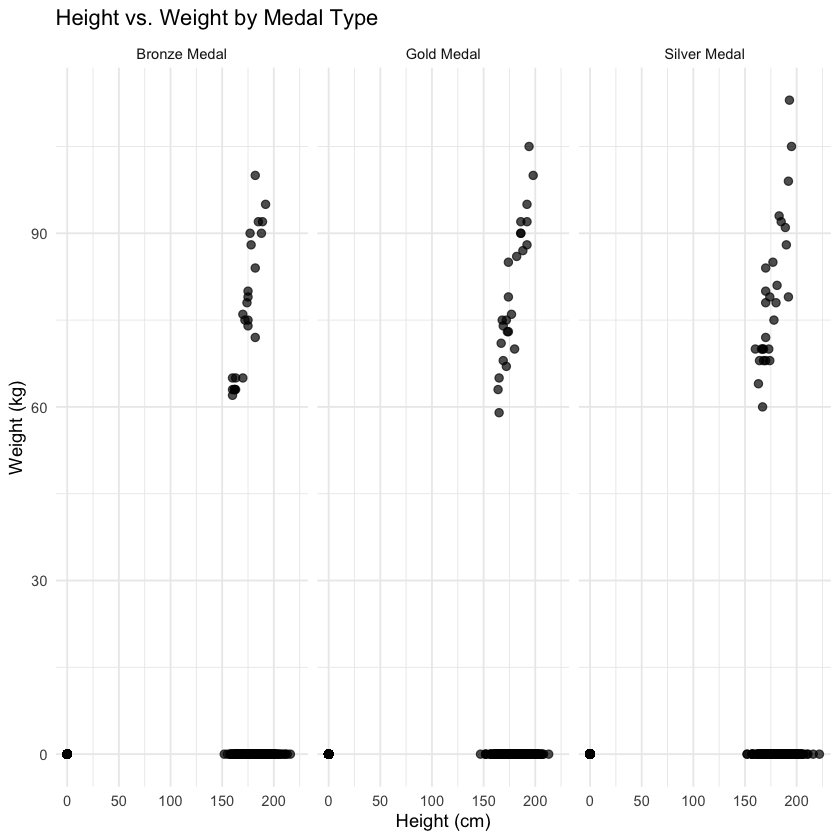

In [27]:
athletes_medals <- medals %>%
  left_join(athletes %>% select(code, height, weight), by = "code")

ggplot(athletes_medals_clean,
       aes(x = height, y = weight)) +
  geom_point(alpha = 0.7, size = 2) +
  facet_wrap(~ medal_type) +
  labs(
    title = "Height vs. Weight by Medal Type",
    x = "Height (cm)",
    y = "Weight (kg)"
  ) +
  theme_minimal()

Interpretation: The first bar graph shows that the distribution of age is fairly similar between medalists and non-medalists. The first scatterplot shows that medalists and non-medalists have very similar height and weight distributions, with substantial overlap between the two groups. While medalists appear slightly more common in the mid-to-higher height and weight ranges, the difference is small, suggesting that these variables alone do not strongly predict medal status. Lastly, when stratified by medal type the height and weight distributions remanin consistant. Silver medalists have the most variation in hight and weight and bronze has the least variation.

Plausible Answers:
- The graphs show minimal differences in age, height, or weight across medal status categories.
- Variation among medal types likely reflects the mix of sports represented rather than inherent physical differences.
- Suggests that physical characteristics alone do not determine success.

Next Steps: Incorporate performance-related variables (event category, training history, country resources); examine interactions between physical traits and sport type. Run statistical tests (t-tests or ANOVA) to confirm whether differences are significant; consider adding new predictors to better explain medal outcomes.

### Research Question 2: Can the height and weight of an athlete be used to predict if they are a medalist or non-medalist?  
Method: Logistic Regression


Call:
glm(formula = medalist ~ height + weight, family = binomial, 
    data = df_clean)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.4230055  0.0325015 -43.783  < 2e-16 ***
height      -0.0009545  0.0002812  -3.395 0.000687 ***
weight       0.0061144  0.0017125   3.570 0.000356 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10633  on 11107  degrees of freedom
Residual deviance: 10613  on 11105  degrees of freedom
AIC: 10619

Number of Fisher Scoring iterations: 4


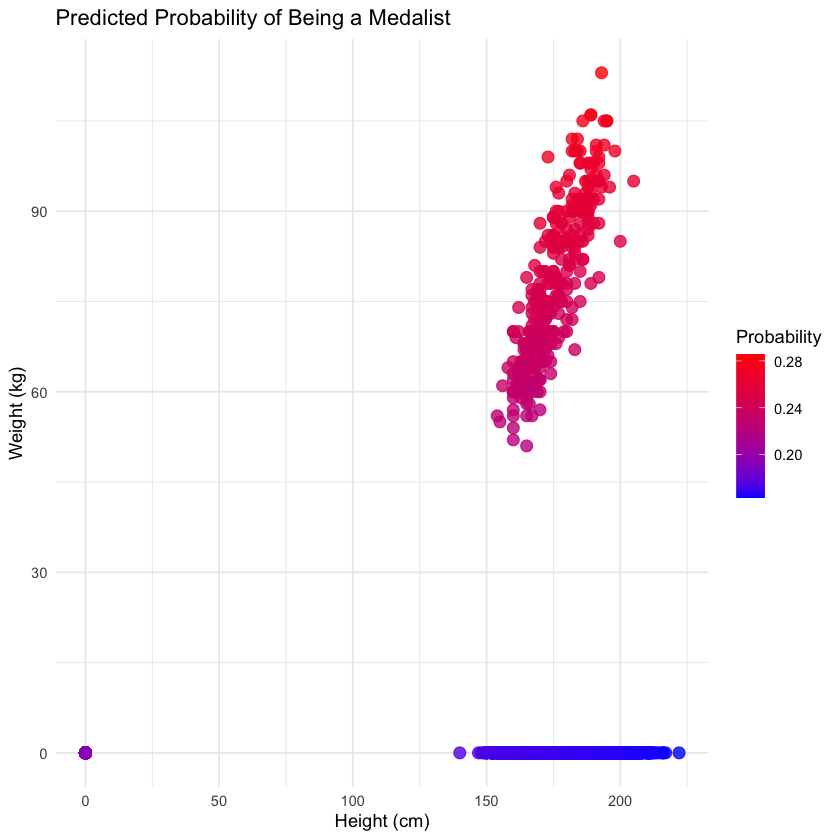

In [11]:
df$medalist <- factor(df$medalist, levels = c("Non-medalist", "Medalist"))

df_clean <- df %>% drop_na(height, weight)

model <- glm(medalist ~ height + weight, data = df_clean, family = binomial)

df_clean$pred_prob <- predict(model, type = "response")

summary(model)

### Graph Logistic Regression 

ggplot(df_clean, aes(x = height, y = weight, color = pred_prob)) +
  geom_point(size = 3, alpha = 0.8) +
  scale_color_gradient(low = "blue", high = "red") +
  labs(title = "Predicted Probability of Being a Medalist",
       x = "Height (cm)",
       y = "Weight (kg)",
       color = "Probability") +
  theme_minimal()


Interpretation: The logistic regression analysis suggests that height and weight alone are weak predictors of whether an athlete is a medalist. Predicted probabilities are generally low, with most athletes falling in the 0–0.3 range, indicating limited predictive power. Slightly higher probabilities are observed for athletes with moderate to higher height (around 160–190 cm) and weight (50–90 kg), suggesting that medalists tend to cluster in this range, although there is considerable overlap with non-medalists. Some extreme values at height or weight equal to zero likely reflect missing or erroneous data and should be cleaned to avoid misleading results. Overall, there is a weak positive association between height/weight and the likelihood of being a medalist, but these variables alone cannot reliably classify athletes.

Plausible Answers:
- The logistic regression results indicate that height and weight are weak predictors of medal status.
- Height and weight alone fail to capture the complexity of athletic performance across diverse sports.
- The low predicted probabilities indicate that other unmeasured factors like skill, training quality, event specialization likely play much larger roles.

Next Steps: Add additional predictors such as age, event type, gender, or country to improve model performance. Visualize ROC curves to assess model performance.

### Research Question 3: Can we cluster countries based on their medal-winning patterns?

Method 1: PCA 

country,Bronze Medal,Gold Medal,Silver Medal
<chr>,<int>,<int>,<int>
AIN,1,1,4
Albania,2,0,0
Algeria,1,2,0
Argentina,16,1,2
Armenia,1,0,3
Australia,45,33,45
Austria,3,3,0
Azerbaijan,3,2,2
Bahrain,1,2,1


Importance of components:
                          PC1     PC2     PC3
Standard deviation     1.6407 0.40386 0.38058
Proportion of Variance 0.8973 0.05437 0.04828
Cumulative Proportion  0.8973 0.95172 1.00000

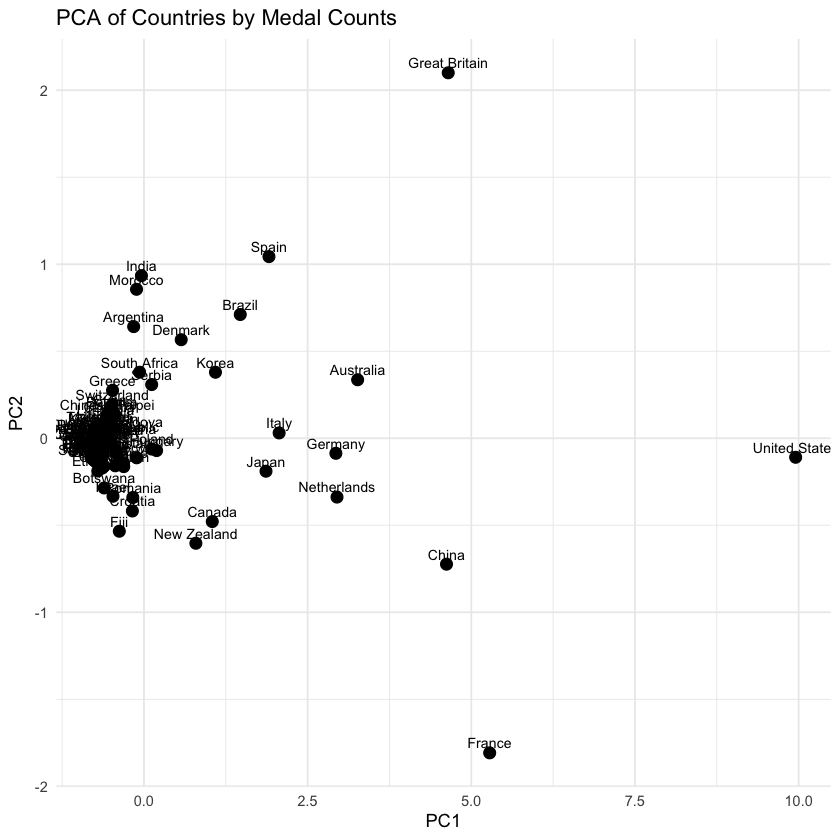

In [30]:
country_medals <- medals %>%
  group_by(country, medal_type) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = medal_type, values_from = count, values_fill = 0)

country_medals

medals_matrix <- country_medals %>% select(-country)
medals_scaled <- scale(medals_matrix)
pca <- prcomp(medals_scaled, center = TRUE, scale. = TRUE)
summary(pca)

pca_df <- data.frame(
  country = country_medals$country,
  PC1 = pca$x[,1],
  PC2 = pca$x[,2]
)

ggplot(pca_df, aes(x = PC1, y = PC2, label = country)) +
  geom_point(size = 3) +
  geom_text(vjust = -0.5, size = 3) +
  labs(title = "PCA of Countries by Medal Type Counts") +
  theme_minimal()

Method 2: Clustering K-Means 

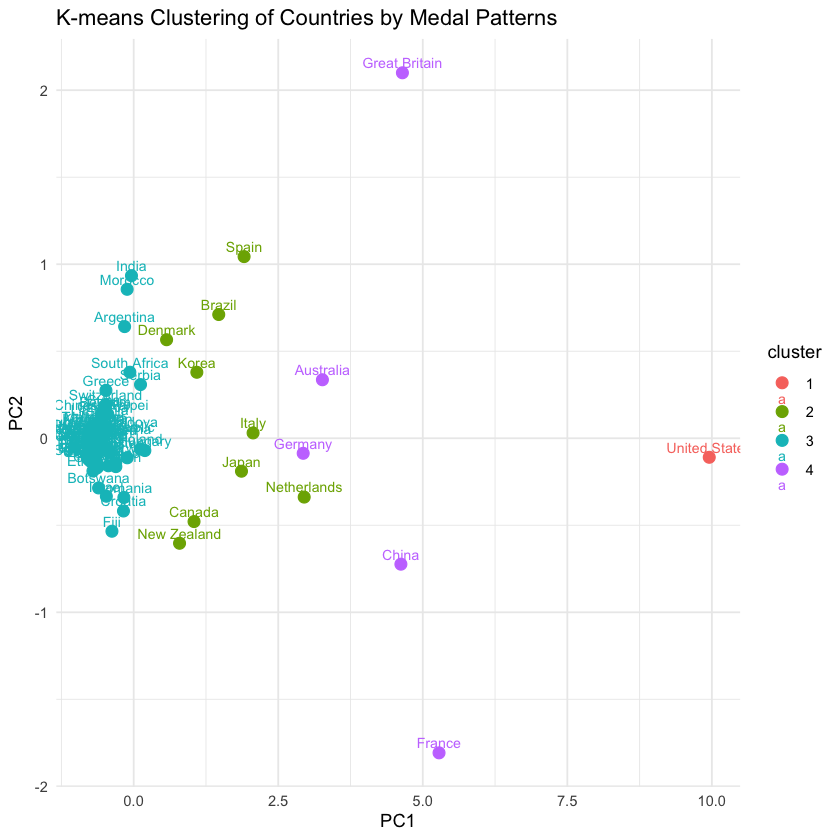

In [31]:
set.seed(123)
k <- 4
kmeans_res <- kmeans(medals_scaled, centers = k, nstart = 25)

pca_df$cluster <- factor(kmeans_res$cluster)

ggplot(pca_df, aes(x = PC1, y = PC2, color = cluster, label = country)) +
  geom_point(size = 3) +
  geom_text(vjust = -0.5, size = 3) +
  labs(title = "K-means Clustering of Countries by Medal Patterns") +
  theme_minimal()

Figure Interpretation: The k-means analysis produced four clusters that separate countries based on similarities in their medal-winning patterns after PCA reduction. Cluster 1 (red) appears to contain extreme outliers, such as the United States, which has a distinctive medal profile that sets it far apart along PC1. Cluster 2 (green) includes a group of mid-range countries such as Brazil, Spain, the Netherlands, Italy, Japan, and others positioned closer to the center of the PCA space, suggesting moderate but varied medal performance. Cluster 3 (teal) is the largest and most compact group, containing many countries with relatively similar and lower medal totals, which cluster tightly near the origin—indicating minimal variation in medal types. Cluster 4 (purple) includes countries such as Great Britain, France, China, and Australia, which are separated from the main cluster in different directions, suggesting unique performance patterns distinct from both the highest-outlier country and the mid-range cluster. Overall, the PCA visualization shows that k-means successfully identified meaningful structure in the medal data, with clusters representing groups of countries that share similar overall medal profiles.

Plausible Answers: 
- The k-means results indicate that countries can be meaningfully clustered based on medal-winning patterns.
- The separation along PC1 and PC2 suggests differences in gold–silver–bronze composition across countries.
- Clustering may reveal performance-based groupings that reflect broader global patterns.
- Cluster structure may connect to socioeconomic factors or differences in sports investment.

Next steps: Add variables such as GDP, population demographics, or number of athletes to explore what drives these clusters, test alternative clustering methods like hierarchical clustering, or evaluate different values of k.